In [62]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory 
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/test-image-2/Screenshot 2025-07-01 232600.png
/kaggle/input/testing/e30c187d-dc7f-44ee-bba0-c9762333230f.png
/kaggle/input/handwritten-math-symbols/dataset/.directory
/kaggle/input/handwritten-math-symbols/dataset/7/h2oADiw9.png
/kaggle/input/handwritten-math-symbols/dataset/7/i41zVQ0G.png
/kaggle/input/handwritten-math-symbols/dataset/7/JW2ti3bD.png
/kaggle/input/handwritten-math-symbols/dataset/7/2675.jpg
/kaggle/input/handwritten-math-symbols/dataset/7/96357.jpg
/kaggle/input/handwritten-math-symbols/dataset/7/25946.jpg
/kaggle/input/handwritten-math-symbols/dataset/7/6vLGEJcM.png
/kaggle/input/handwritten-math-symbols/dataset/7/62062.jpg
/kaggle/input/handwritten-math-symbols/dataset/7/6458.jpg
/kaggle/input/handwritten-math-symbols/dataset/7/68305.jpg
/kaggle/input/handwritten-math-symbols/dataset/7/41510.jpg
/kaggle/input/handwritten-math-symbols/dataset/7/68994.jpg
/kaggle/input/handwritten-math-symbols/dataset/7/58.jpg
/kaggle/input/handwritten-math-symbols/datase

In [1]:
import numpy as np
import pandas as pd
import os
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,SimpleRNN, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import load_model
import cv2
from google.colab.patches import cv2_imshow
     

2025-07-02 11:43:26.504676: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1751456606.526914    2399 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1751456606.533622    2399 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
def extractImage(datadir):
    imageData=[]
    imageLabel=[]
    folders_to_include=['1','2','3','4','5','6','7','8','9','0','add','div','mul','sub']
    for folders in os.listdir(datadir):
        if folders in folders_to_include:
            path=os.path.join(datadir, folders)
            for images in os.listdir(path):
                img=cv2.imread(os.path.join(path, images), cv2.IMREAD_GRAYSCALE)
                if img is None:
                    print(f"⚠️ Couldn't read image: {os.path.join(path, images)}")
                    continue
                img=cv2.resize(img, (32, 32))
                imageData.append(img)
                imageLabel.append(folders)

    combined=list(zip(imageData, imageLabel))
    random.shuffle(combined)
    imageData, imageLabel=zip(*combined)

    return (imageData, imageLabel)

In [3]:
for folders in os.listdir("/kaggle/input/handwritten-math-symbols/dataset"):
    print(folders, type(folders))

7 <class 'str'>
2 <class 'str'>
5 <class 'str'>
div <class 'str'>
8 <class 'str'>
x <class 'str'>
0 <class 'str'>
y <class 'str'>
z <class 'str'>
add <class 'str'>
3 <class 'str'>
eq <class 'str'>
dec <class 'str'>
sub <class 'str'>
1 <class 'str'>
4 <class 'str'>
9 <class 'str'>
mul <class 'str'>
6 <class 'str'>
.directory <class 'str'>


In [4]:
imageData=[]
imageLabel=[]
datadir="/kaggle/input/handwritten-math-symbols/dataset"
imageData, imageLabel=extractImage(datadir)

⚠️ Couldn't read image: /kaggle/input/handwritten-math-symbols/dataset/9/.directory


In [5]:
X=np.array(imageData)/255.0
X=np.expand_dims(X, axis=-1)
X.shape

(7750, 32, 32, 1)

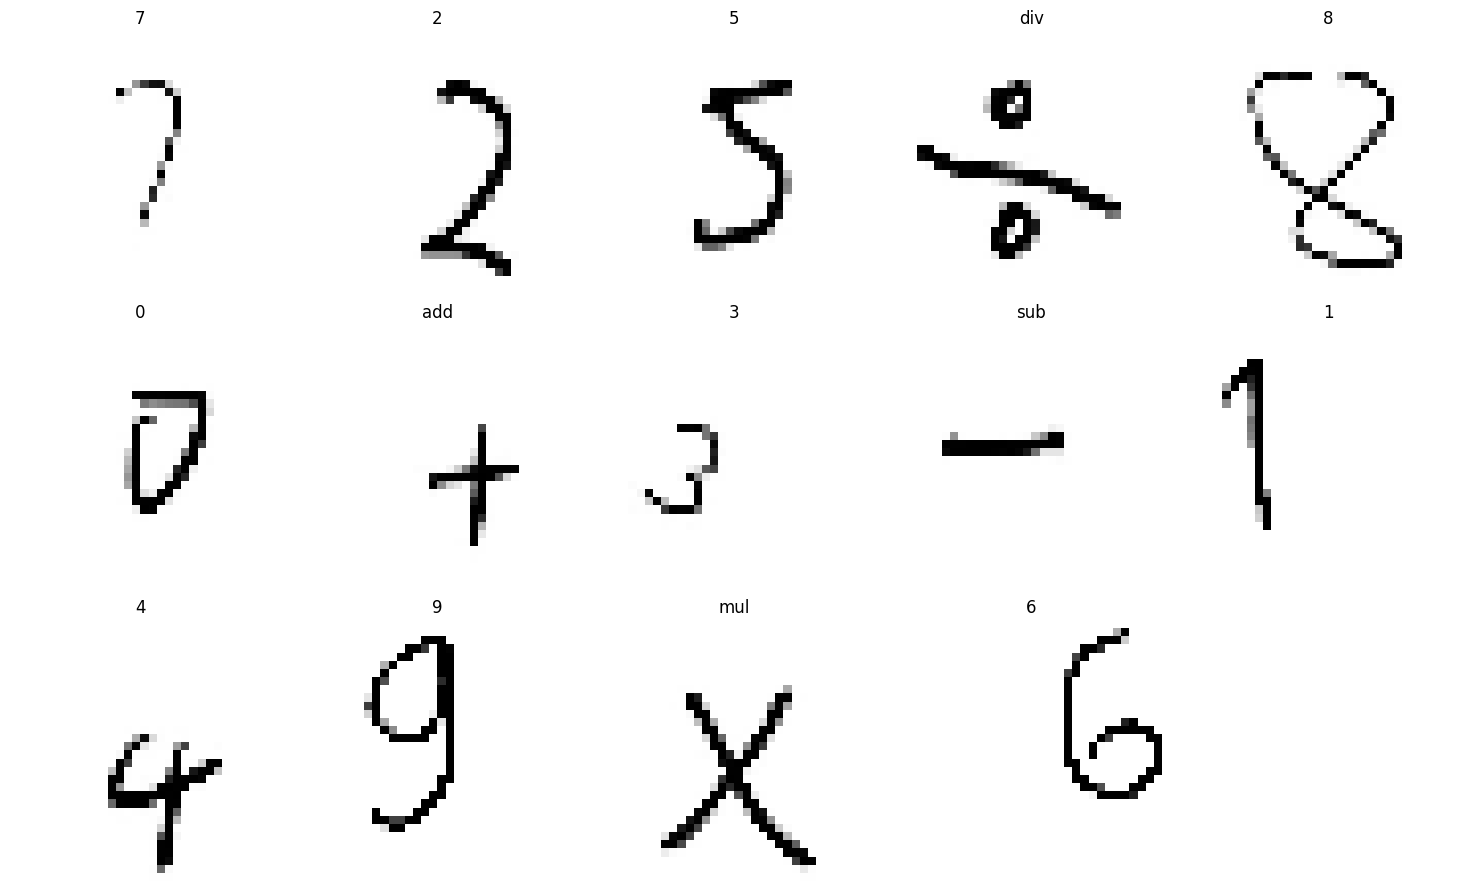

In [49]:
folders_to_include=['1','2','3','4','5','6','7','8','9','0','add','div','mul','sub']
images=[]
labels=[]
each_count={}
for folders in os.listdir(datadir):
    if folders in folders_to_include:
        path=os.path.join(datadir, folders)
        image_list=os.listdir(path)
        each_count[folders]=len(image_list)
        random_image=random.choice(image_list)
        image=cv2.imread(os.path.join(path, random_image),  cv2.IMREAD_GRAYSCALE)
        if image is None:
            image=random.choice(path)
        image=cv2.resize(image, (32,32))
        images.append(image)
        labels.append(folders)

images=np.array(images)
images=images/255.0
images=np.expand_dims(images, axis=-1)
fig, axes = plt.subplots(3, 5, figsize=(15, 9))
axes = axes.flatten()

for i, ax in enumerate(axes):
    if i < len(images):
        ax.imshow(images[i], cmap='gray')
        ax.set_title(f"{labels[i]}")
        ax.axis('off')
    else:
        ax.axis('off')
plt.tight_layout()
plt.show()
    



In [18]:
each_count

{'7': 533,
 '2': 433,
 '5': 433,
 'div': 618,
 '8': 554,
 '0': 595,
 'add': 596,
 '3': 541,
 'sub': 655,
 '1': 562,
 '4': 526,
 '9': 547,
 'mul': 577,
 '6': 581}

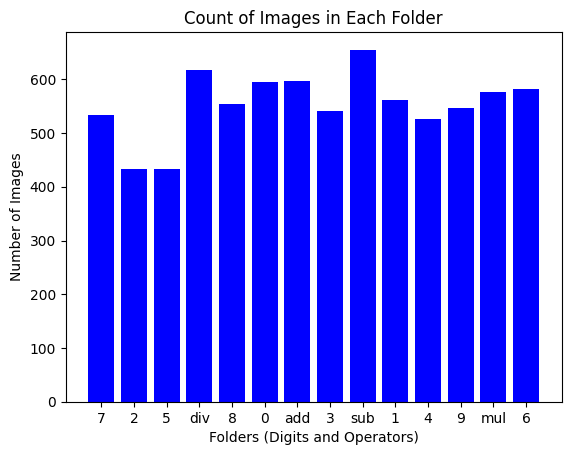

In [19]:
plt.bar(each_count.keys(), each_count.values(), color='blue')
plt.xlabel('Folders (Digits and Operators)')
plt.ylabel('Number of Images')
plt.title('Count of Images in Each Folder')
plt.show()

In [20]:
encoder=LabelEncoder()
y=encoder.fit_transform(imageLabel)

In [21]:
mapping={i:val for i, val in enumerate(encoder.classes_)}
mapping

{0: '0',
 1: '1',
 2: '2',
 3: '3',
 4: '4',
 5: '5',
 6: '6',
 7: '7',
 8: '8',
 9: '9',
 10: 'add',
 11: 'div',
 12: 'mul',
 13: 'sub'}

In [22]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3, random_state=42)
X_train.shape

(5425, 32, 32, 1)

In [23]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    zoom_range=0.2,
    width_shift_range=0.1,
    height_shift_range=0.1,
    brightness_range=[0.8, 1.2],
    shear_range=10
)



In [38]:
from tensorflow.keras.layers import GlobalAveragePooling2D

cnn_model=Sequential()
cnn_model.add(Conv2D(64, (3,3), input_shape=(32,32,1), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2,2)))
cnn_model.add(Conv2D(64, (3,3), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2,2)))
cnn_model.add(Conv2D(64, (3,3), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2,2)))
cnn_model.add(Dropout(0.5))
cnn_model.add(Flatten())
cnn_model.add(Dense(124, activation='relu'))
cnn_model.add(Dense(14, activation='softmax'))

In [39]:
cnn_model.summary()
cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 30, 30, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 15, 15, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 13, 13, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 2, 2, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 2, 2, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 124)                 │          31,868 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 14)                  │           1,750 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 108,114 (422.32 KB)

 Trainable params: 108,114 (422.32 KB)

 Non-trainable params: 0 (0.00 B)

In [40]:
cnn_history=cnn_model.fit(X_train,y_train, epochs=30, validation_data=(X_test,y_test))

Epoch 1/30
170/170 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.0967 - loss: 2.5890 - val_accuracy: 0.5394 - val_loss: 1.4559
Epoch 2/30
170/170 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5451 - loss: 1.3712 - val_accuracy: 0.7665 - val_loss: 0.7284
Epoch 3/30
170/170 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7331 - loss: 0.8139 - val_accuracy: 0.8185 - val_loss: 0.5546
Epoch 4/30
170/170 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8056 - loss: 0.6205 - val_accuracy: 0.8581 - val_loss: 0.4436
Epoch 5/30
170/170 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8415 - loss: 0.4838 - val_accuracy: 0.8985 - val_loss: 0.3289
Epoch 6/30
170/170 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8675 - loss: 0.4160 - val_accuracy: 0.8895 - val_loss: 0.3377
Epoch 7/30
170/170 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8783 - loss: 0.3837 - val_accuracy: 0.9187 - val_loss: 0.2573
Epoch 8/30
170/170 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8945 - loss: 0.3269 - val_accuracy: 0

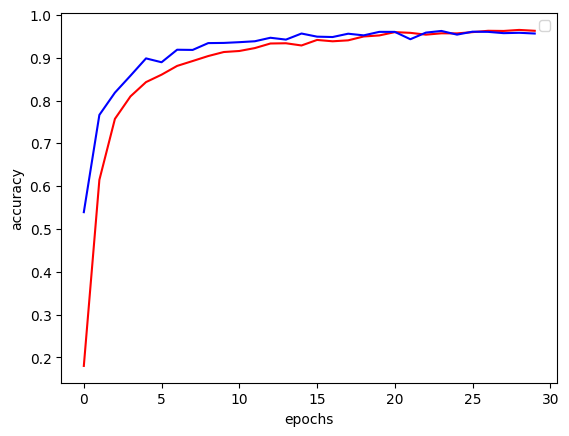

In [41]:
plt.plot(cnn_history.history['accuracy'], color='red')
plt.plot(cnn_history.history['val_accuracy'], color='blue')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [42]:
cnn_model.save('cnn_model.keras')

In [43]:
prediction=cnn_model.predict(images)
prediction=np.argmax(prediction,axis=1)
prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 328ms/step


array([ 7,  2,  5, 11,  8,  0, 10,  3, 13,  1,  4,  9, 12,  6])

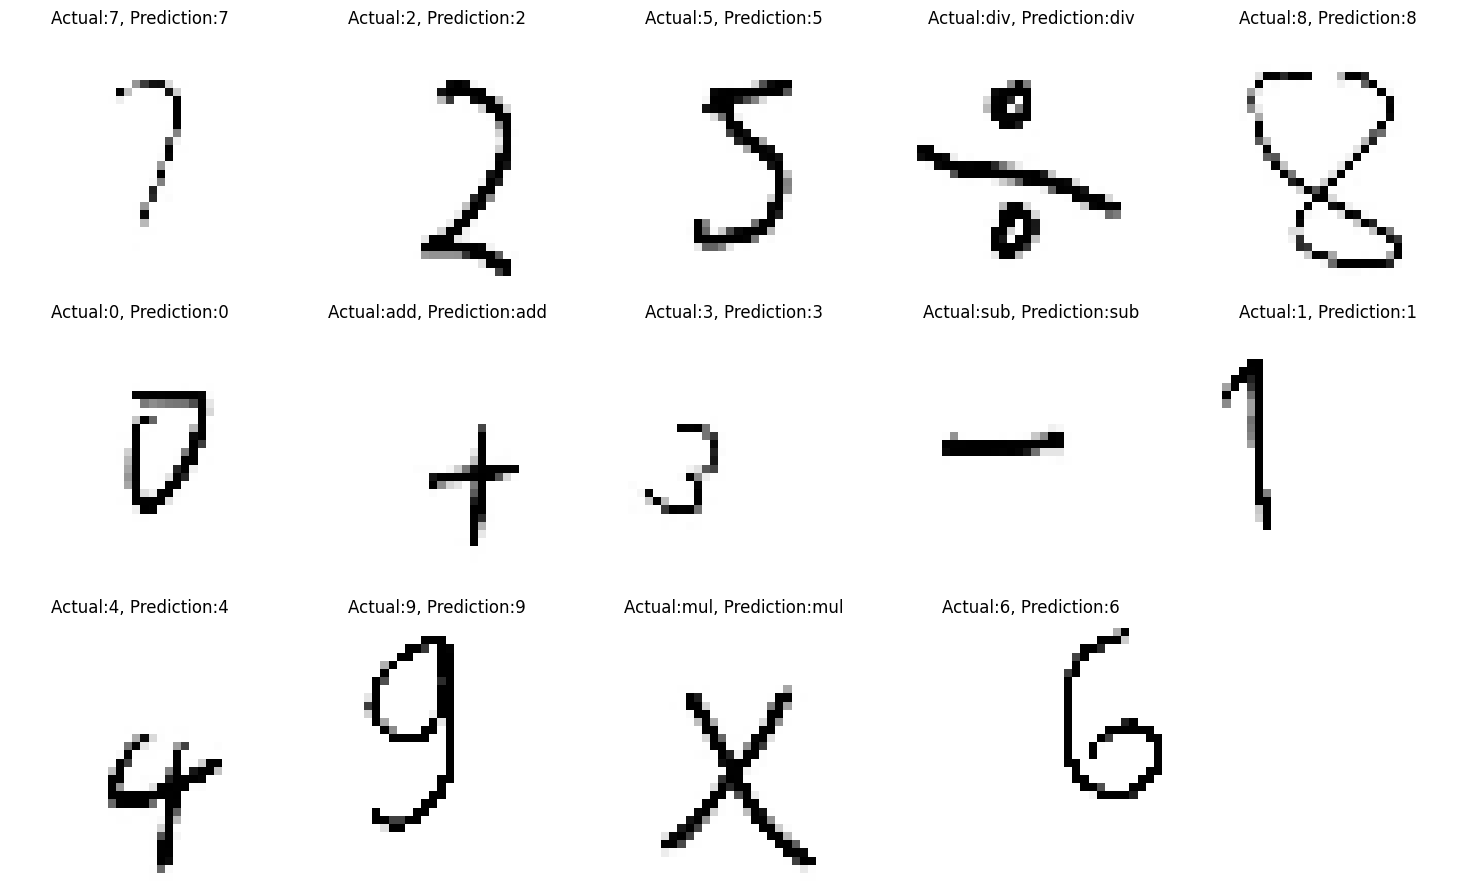

In [50]:

fig, axes = plt.subplots(3, 5, figsize=(15, 9))
axes = axes.flatten()

for i, ax in enumerate(axes):
    if i < len(images):
        ax.imshow(images[i], cmap='gray')
        ax.set_title(f"Actual:{labels[i]}, Prediction:{mapping[prediction[i]]}")
        ax.axis('off')
    else:
        ax.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
from tensorflow.keras.models import load_model
import cv2
import numpy as np
import matplotlib.pyplot as plt
label = {0: '0', 1: '1', 2: '2', 3: '3', 4: '4', 5: '5', 6: '6', 7: '7', 8: '8', 9: '9', 10: '+', 11: '÷', 12: '*', 13: '-'}

model=load_model('cnn_model.h5')

def prdict(image_path):
    image=cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    #converts black to white and white to black
    #means convert number to white and background to black as countour can be captured easily in black background
    _,binary_image=cv2.threshold(image, 128, 255, cv2.THRESH_BINARY_INV)
    contours,_=cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    #geeting the (x,y,w,h) (x,y)-top left corner of contour (w,h)- width and height of image
    #Here its an list of contour of all the digits or operators present in the image
    bounding_boxes=[]
    filtered_contours=[]
    for contour in contours:
        x,y,w,h=cv2.boundingRect(contour)
        if w*h>=100:
            bounding_boxes.append((x,y,w,h))
            filtered_contours.append(contour)
            
    # bounding_boxes=[cv2.boundingRect(contour) for contour in contours]

    #sorting all the contours based on there x-coordinate
    sorted_indices = sorted(range(len(bounding_boxes)), key=lambda i: bounding_boxes[i][0])

    #arranging the contour from left ro right so that it can be readible and solvable
    sorted_contours=[filtered_contours[i] for i in sorted_indices]

    #capturing each digit individually
    rois=[]
    #adding padding around the image so that it can be captured carefully
    padding=15

    for contour in sorted_contours:
        x,y,w,h=cv2.boundingRect(contour)
        x_start=max(0, x-padding)
        y_start=max(0, y-padding)
        x_end=min(image.shape[1], x+w+padding)
        y_end=min(image.shape[0], y+h+padding)

        roi=image[y_start:y_end, x_start:x_end]
        roi=cv2.resize(roi, (32,32))
        rois.append(roi)

    print
    rois=np.array(rois)
    rois=rois/255.0
    rois=np.expand_dims(rois, axis=-1)
    
    predictions=model.predict(rois)
    predicted_labels=np.argmax(predictions, axis=1)
    print(predicted_labels)
    #converts the grayscale image to BGR color 
    image_color=cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
    for i, contour in enumerate(sorted_contours):
        x,y,w,h=cv2.boundingRect(contour)
        label_one=label[predicted_labels[i]]
        cv2.rectangle(image_color, (x,y), (x+w,y+h), (0,255,0), 2)
        cv2.putText(image_color, label_one, (x,y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255,0,0), 2)

    plt.figure(figsize=(10, 10))
    plt.imshow(cv2.cvtColor(image_color, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

    
    equation=''.join(label[predicted_labels[i]] for  i in range(len(predicted_labels)))  
    safe_equation = equation.replace('÷', '/')
    print(f'Predicted equation: {equation}')
    print(f'Result: {eval(safe_equation)}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step
[ 1  1 10  5]


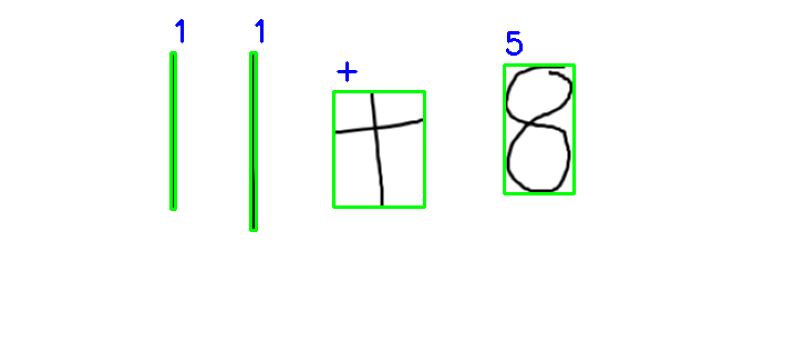

Predicted equation: 11+5
Result: 16


In [21]:
prdict("temp/temp.png")